In [ ]:
import numpy as np
import pandas as pd
import seaborn #data visualization library

In [ ]:
t = seaborn.load_dataset('titanic') # load the Titanic dataset using Seaborn and describe as variable t
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
num_passengers = t.shape[0]# Find the number of passengers in the dataset
print("Number of passengers described in the dataset:", num_passengers)# Print the number of passengers


Number of passengers described in the dataset: 891


In [ ]:
distinct_values_count = len(t['who'].unique())# Calculate the number of distinct values in the 'who' column
distinct_values = t['who'].unique()# Store the distinct values in the 'who' column

print("Number of distinct values in the 'who' column:", distinct_values_count)
print("Distinct values in the 'who' column:", distinct_values)


Number of distinct values in the 'who' column: 3
Distinct values in the 'who' column: ['man' 'woman' 'child']


In [ ]:
missing_values = t.isna().sum()# Calculate the number of missing values (NaN) in each column of the dataset
# Print the number of missing values in each data column
print("Number of missing values in each data column:")
print(missing_values)
# Print the columns with missing values, if any
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("\nColumns with missing values:")
    print(columns_with_missing_values.index.tolist())
else:
    print("\nNo missing values found in any column.")


Number of missing values in each data column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Columns with missing values:
['age', 'embarked', 'deck', 'embark_town']


In [ ]:
passengers_over_60 = t[t['age'] > 60]# Select passengers with ages over 60
number_of_passengers_over_60 = len(passengers_over_60)# Calculate the number of passengers over 60 years old
print("Number of passengers over 60 years old:", number_of_passengers_over_60)


Number of passengers over 60 years old: 22


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Set the style of the plot to "whitegrid"
seaborn.set_style("whitegrid")


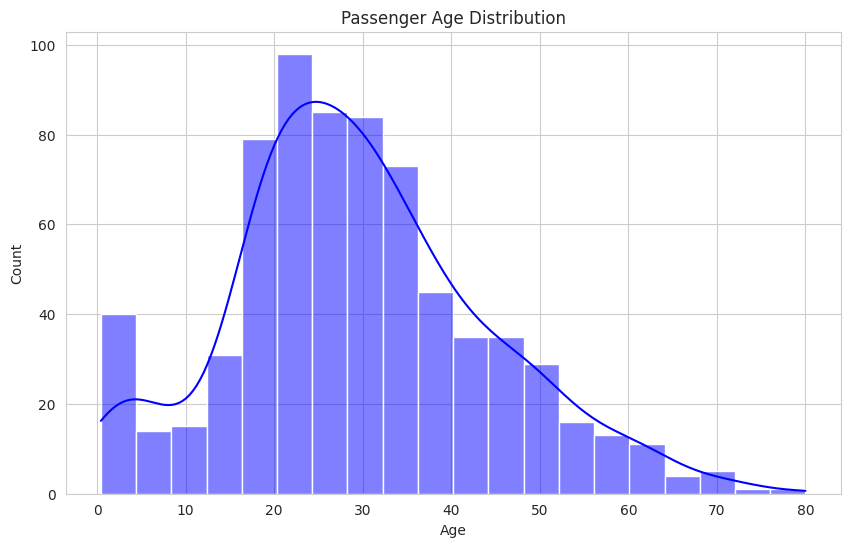

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.histplot(t['age'], kde=True, bins=20, color='Blue')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
# Calculate the 25th, 50th (median), and 75th percentiles of passenger ages
percentiles = t['age'].quantile([0.25, 0.5, 0.75])
print("25th percentile:", percentiles[0.25])
print("50th percentile, median:", percentiles[0.5])
print("75th percentile:", percentiles[0.75])


25th percentile: 20.125
50th percentile, median: 28.0
75th percentile: 38.0


In [ ]:
t.dropna(subset=['embarked'], inplace=True)  # Remove rows with missing 'embarked'


In [ ]:
# Calculate and print average, minimum, and maximum fares
avg_fare, min_fare, max_fare = t['fare'].mean(), t['fare'].min(), t['fare'].max()
print(f"Average Fare: {avg_fare}\nMinimum Fare: {min_fare}\nMaximum Fare: {max_fare}")


Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [ ]:
# Calculate the proportions of passengers in different classes
class_proportions = t['class'].value_counts(normalize=True)
print("\nProportions of Passengers in Different Classes:")
print(class_proportions)


Proportions of Passengers in Different Classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [ ]:
gender_class_ratio = t.groupby(['class', 'sex']).size().unstack()# Group data by 'class' and 'sex', count passengers for each combination
gender_class_ratio['Female-to-Male Ratio'] = gender_class_ratio['female'] / gender_class_ratio['male']# Calculate and add female-to-male ratio for each travel class

# Print the female-to-male ratio in each travel class
print("Female-to-Male Ratio in Each Travel Class:")
print(gender_class_ratio[['Female-to-Male Ratio']])


Female-to-Male Ratio in Each Travel Class:
sex     Female-to-Male Ratio
class                       
First               0.754098
Second              0.703704
Third               0.414986


In [ ]:
# Calculate survival fraction by finding the mean of 'survived' column (binary values)
survival_fraction = t['survived'].mean()
print("Survival Rate:", survival_fraction)



Survival Rate: 0.38245219347581555


In [ ]:
# Calculate survival rates by gender
survival_rates_by_gender = t.groupby('sex')['survived'].mean()
print("Survival Rates by Gender:")
print(survival_rates_by_gender)


Survival Rates by Gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [ ]:
# Create a pivot table displaying survival rates by passenger class and gender
# Use 'pivot_table' function with row index ('class'), column index ('sex'), and values ('survived'), aggregated using mean
survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("Survival Rates by Class and Gender:")# Print the table of survival rates by class and gender
print(survival_table)


Survival Rates by Class and Gender:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [ ]:
# Create a pivot table showing the number of survivors and average fare by gender and cabin class
pivot_table = t.pivot_table(index='sex', columns='class', values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'})
print("Survivor Count and Average Fare by Gender and Cabin Class:")# Print the table with survivor count and average fare by gender and cabin class
print(pivot_table)


Survivor Count and Average Fare by Gender and Cabin Class:
              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.693750  21.970121  16.118810       89     70    72
male     67.226127  19.741782  12.661633       45     17    47
